# Session 1 - Your "first" DataScience problem

In [31]:
# some imports

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [32]:
# download and unzip the dataset from the following website into the dataset folder
#https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/download


# save filepath to variable for easier access
melbourne_file_path = 'dataset/housing-snapshot/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 


from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(melbourne_data, test_size=0.6, random_state=42)

train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)
train_set.to_csv('dataset/housing-snapshot/train_set.csv',index_label='index')
test_set.to_csv('dataset/housing-snapshot/full_test_set.csv',index_label='index')
test_set.drop(axis=1,labels= 'Price').to_csv('dataset/housing-snapshot/test_set.csv',index_label='index')
test_set[['Price']].to_csv('dataset/housing-snapshot/test_set_labels.csv',index_label='index')
test_set[['Price']] = np.random.randint(100000, 10000000, test_set.shape[0])
test_set[['Price']].to_csv('dataset/housing-snapshot/sampleSubmission.csv',index_label='index')

# print a summary of the data in Melbourne data
train_set.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [33]:
train_set = pd.read_csv('dataset/housing-snapshot/train_set.csv',index_col=0) 
test_set = pd.read_csv('dataset/housing-snapshot/test_set.csv',index_col=0) 


## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [34]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [35]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [36]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.

In [37]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [38]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [39]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

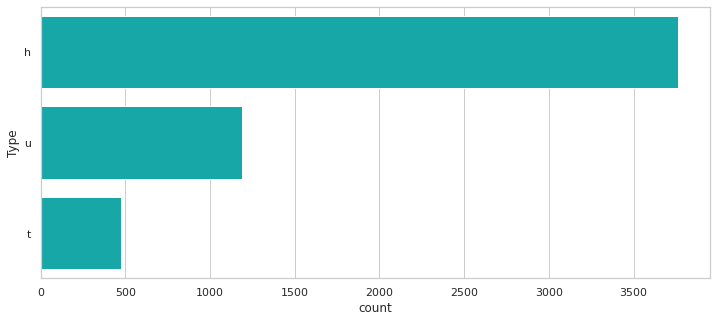

In [40]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

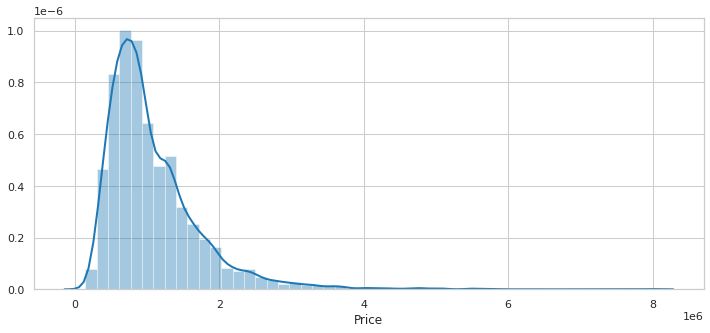

In [41]:
sns.distplot(train_set["Price"])
plt.show()

## BASELINE MODEL
### https://www.kaggle.com/c/mlub-housing-house-prediction/notebooks

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 397813.8038017269
R^2:  0.6219552116625728


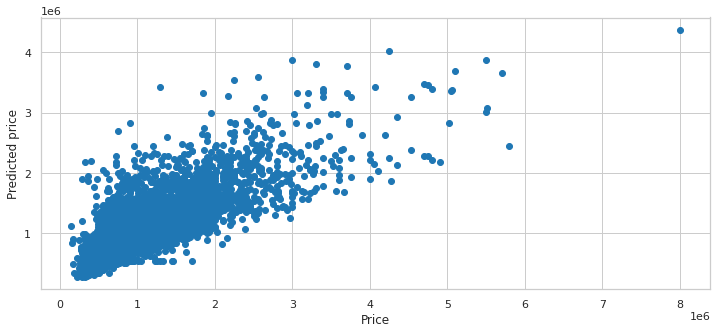

In [42]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


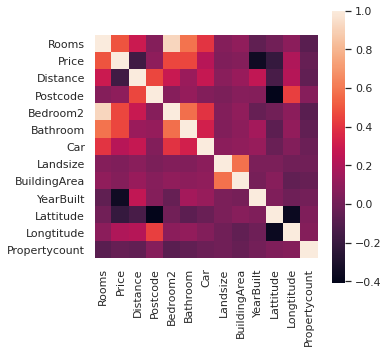

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
correlation = train_set.corr()
sns.heatmap(correlation, vmax=1, square=True)
plt.show()

Com es pot observar, les correlacions més interessants es troben Rooms-Bedroom, Price-YearBuilt, Rooms-Bathroom. Si filem més prim podem veure que Car, Distance, Landsize i BuildingArea també tenen rellevància.

In [44]:
train_set['Corr_prod'] = train_set['Rooms'] * train_set['Bedroom2'] * train_set['Bathroom']
test_set['Corr_prod'] = test_set['Rooms'] * test_set['Bedroom2'] * test_set['Bathroom']



train_set['BuildingArea'] = train_set['BuildingArea'].fillna(train_set['BuildingArea'].mean())
test_set['BuildingArea'] = test_set['BuildingArea'].fillna(test_set['BuildingArea'].mean())

train_set['YearBuilt'] = train_set['YearBuilt'].fillna(train_set['YearBuilt'].mean())
test_set['YearBuilt'] = test_set['YearBuilt'].fillna(test_set['YearBuilt'].mean())
train_set

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Corr_prod
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,163.46243,1965.219564,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,32.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,163.46243,1965.219564,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,4.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.00000,1950.000000,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,9.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,163.46243,1930.000000,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,9.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.00000,1970.000000,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,163.46243,1930.000000,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0,9.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.00000,1890.000000,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0,4.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,163.46243,1993.000000,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0,9.0


In [53]:
train_set['Corr_sum'] = train_set['Rooms'] * train_set['Bedroom2'] * train_set['Bathroom']
test_set['Corr_sum'] = test_set['Rooms'] * test_set['Bedroom2'] * test_set['Bathroom']

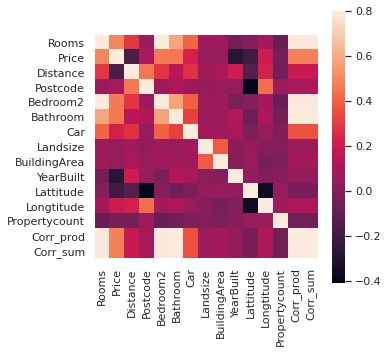

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
correlation = train_set.corr()
sns.heatmap(correlation, vmax=.8, square=True)
plt.show()

----- EVALUATION ON TRAIN SET ------
RMSE 330383.7384887665
R^2:  0.739252061061624


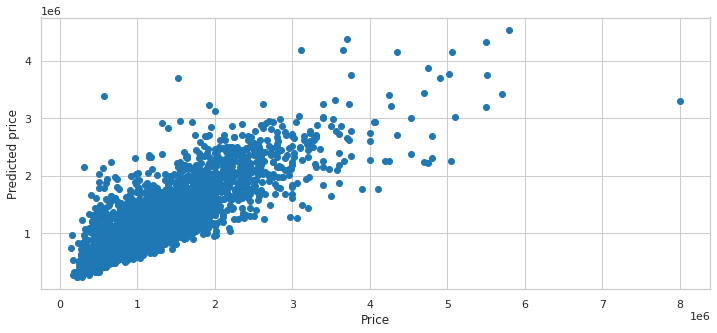

In [57]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt', 'Distance', 'Bathroom', 'Bedroom2', 'Propertycount', 'Corr_sum']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]
## the model
# KNeighborsRegressor

from sklearn import neighbors

n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/problem_submission.csv',index=False)

Explain the choosed model and why you think that is is the best